# (Sucides rates Exploration)
## by (Hassan Mustafa)

## Preliminary Wrangling

> Data set include recordings for sucide numbers in random sample of countries around the world for each sex and each age group from 1986-2016. The mainQuestion we're trying to answer here is that does GDP/Capita (how rich the country is has something to do with sucide Numbers?) and does the age, sex, effect suicide numbers? 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
data=pd.read_csv("master.csv",encoding = "ISO-8859-1")
print(data.head)
print(data.shape)
data.dtypes

<bound method NDFrame.head of        ï»¿country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0               

ï»¿country             object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

### adjusting the columns title. 

In [5]:
data=data.rename(columns={'ï»¿country':'Country','year':'Year','sex':'Sex','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'Gdp','gdp_per_capita ($)':'GdpPerCapita','generation':'Generation'})
data.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,Gdp,GdpPerCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
#checking random sample of the data set
print(data.tail)
data.describe()

<bound method NDFrame.tail of           Country  Year     Sex          Age  SuicidesNo  Population  \
0         Albania  1987    male  15-24 years          21      312900   
1         Albania  1987    male  35-54 years          16      308000   
2         Albania  1987  female  15-24 years          14      289700   
3         Albania  1987    male    75+ years           1       21800   
4         Albania  1987    male  25-34 years           9      274300   
...           ...   ...     ...          ...         ...         ...   
27815  Uzbekistan  2014  female  35-54 years         107     3620833   
27816  Uzbekistan  2014  female    75+ years           9      348465   
27817  Uzbekistan  2014    male   5-14 years          60     2762158   
27818  Uzbekistan  2014  female   5-14 years          44     2631600   
27819  Uzbekistan  2014  female  55-74 years          21     1438935   

       Suicides100kPop     CountryYear  HDIForYear             Gdp  \
0                 6.71     Albania1

,Year,SuicidesNo,Population,Suicides100kPop,HDIForYear,GdpPerCapita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
print(data.Country.value_counts())
print(data.Year.value_counts())
#as we can notice not all years include fixed number of countries, and not every country have same amount of recorded yeara.

Austria                   382
Iceland                   382
Mauritius                 382
Netherlands               382
United States             372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Cabo Verde                 12
Macau                      12
Mongolia                   10
Name: Country, Length: 101, dtype: int64
2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: Year, dtype: int64


In [8]:
#taking one example to check if every country has all generations and sexes data
dataIceland=data[data['Country']=='Iceland']
print(dataIceland.Year.value_counts().sort_index())
#Iceland data in 2016 is missing some generations
dataIceland_2016=dataIceland[dataIceland['Year']==2016]
print(data.Generation.unique())
print(dataIceland_2016.Generation.unique())
dataIceland_2016.Generation.unique()
#There's only four generations 
print(dataIceland_2016.Generation.unique())
dataIceland_2016.Sex.unique()
#There's two missing generations for data in Iceland 2016

1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    10
Name: Year, dtype: int64
['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']
['Millenials' 'Boomers' 'Generation X' 'Silent']
['Millenials' 'Boomers' 'Generation X' 'Silent']


array(['male', 'female'], dtype=object)

In [9]:
#we just need to keep years which all countries has in each year 12 value for (all generations and sexes data included (6gens,2sexes))
print(data.CountryYear.value_counts())
countsCountry=(data.CountryYear.value_counts()<12).any()
countsCountry=data.CountryYear.value_counts()<12
counts_frame=countsCountry.to_frame()
print(counts_frame)
all_gens_sexes=counts_frame[counts_frame['CountryYear']==True]
data2 = data[~data['CountryYear'].isin(all_gens_sexes.index)]

Chile1990                           12
Saint Vincent and Grenadines2011    12
Slovenia2014                        12
Singapore1992                       12
Chile2007                           12
                                    ..
Thailand2016                        10
Armenia2016                         10
Mongolia2016                        10
Croatia2016                         10
Netherlands2016                     10
Name: CountryYear, Length: 2321, dtype: int64
                                  CountryYear
Chile1990                               False
Saint Vincent and Grenadines2011        False
Slovenia2014                            False
Singapore1992                           False
Chile2007                               False
...                                       ...
Thailand2016                             True
Armenia2016                              True
Mongolia2016                             True
Croatia2016                              True
Netherlands2016    

In [10]:
print(data2.info())
print(data2.isnull().sum())
#HDI: almost all datais null so we're going to remove it
data2=data2.drop('HDIForYear',axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27660 non-null  object 
 1   Year             27660 non-null  int64  
 2   Sex              27660 non-null  object 
 3   Age              27660 non-null  object 
 4   SuicidesNo       27660 non-null  int64  
 5   Population       27660 non-null  int64  
 6   Suicides100kPop  27660 non-null  float64
 7   CountryYear      27660 non-null  object 
 8   HDIForYear       8364 non-null   float64
 9   Gdp              27660 non-null  object 
 10  GdpPerCapita     27660 non-null  int64  
 11  Generation       27660 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.7+ MB
None
Country                0
Year                   0
Sex                    0
Age                    0
SuicidesNo             0
Population             0
Suicides100kPop        0
Count

## Excluding only countries that has data from 1985 to 2016

In [11]:
counts2Country=(data2.Country.value_counts()==372)
counts2_frame=counts2Country.to_frame()
print(counts2_frame)
x=counts2_frame[counts2_frame['Country']==True]
FData= data2[data2['Country'].isin(x.index)]
FData.reset_index()
FData[(FData['Country']=='United States')&(FData['Year']==1986)]
FData.info()

                        Country
United States              True
United Kingdom             True
Argentina                  True
Colombia                   True
Puerto Rico                True
...                         ...
San Marino                False
Bosnia and Herzegovina    False
Macau                     False
Dominica                  False
Cabo Verde                False

[100 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8556 entries, 588 to 27219
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          8556 non-null   object 
 1   Year             8556 non-null   int64  
 2   Sex              8556 non-null   object 
 3   Age              8556 non-null   object 
 4   SuicidesNo       8556 non-null   int64  
 5   Population       8556 non-null   int64  
 6   Suicides100kPop  8556 non-null   float64
 7   CountryYear      8556 non-null   object 
 8   Gdp              

In [12]:
#checking each column exact type
for col in data2.columns:
    print(col, type(data2[col].iloc[0]))
#checking unique tyes to turn them to categories
print(data2.Sex.unique(),data2.Generation.unique())

Country <class 'str'>
Year <class 'numpy.int64'>
Sex <class 'str'>
Age <class 'str'>
SuicidesNo <class 'numpy.int64'>
Population <class 'numpy.int64'>
Suicides100kPop <class 'numpy.float64'>
CountryYear <class 'str'>
Gdp <class 'str'>
GdpPerCapita <class 'numpy.int64'>
Generation <class 'str'>
['male' 'female'] ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [13]:
ordinal_var_dict = {'Age': ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
                    ,'Sex': ['male','female']
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    FData[var] = FData[var].astype(ordered_var)
print(data2.Sex.unique(),data2.Age.unique())

['male' 'female'] ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


### What is the structure of your dataset?

Data are recorded for suicide numbers of random sample of countries in several years for different age groups and sexes, There are 12 data recordings for each year, taking across a period of 30 years for 23 countries in the dataset. 10 features are taken for each recording (Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,Gdp,GdpPerCapita,Generation). some variables are numeric in nature (GDP, Population,sucides per/100K), but variables like (Sex,Age) are categorical.

Sex: Male/Female
Age: 75+ years,55-74 years,35-54 years,25-34 years,15-24 years,5-14 years

### What is/are the main feature(s) of interest in your dataset?

Suicides/100K are the main feature as indicates the percentage of sucides/100k for every age group/sex in a country at a certain year. suicide no could be misleading cause it effected by population. I am going to explore what factor is most determine on sucides, it could be the age group, the sex, the countries GDP, maybe the year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

GDP Per Capita, Sex, Age Group, Year.

## Univariate Exploration

## Exploring the data distrubition of 100k sucides column. 

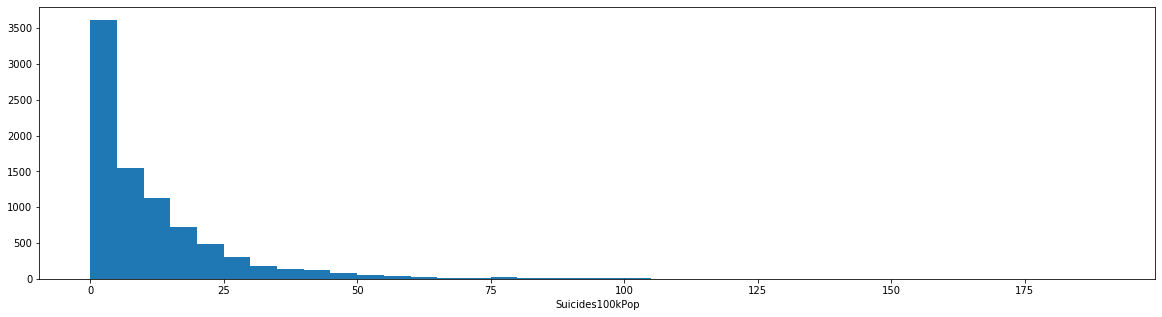

In [14]:
binsize = 5
bins = np.arange(0, FData['Suicides100kPop'].max()+binsize, binsize)
plt.figure(figsize=[20, 5])
plt.hist(data = FData, x = 'Suicides100kPop', bins = bins)
plt.xlabel('Suicides100kPop')
plt.show()

### Most values range between 0 and 25, but we have long tailed distrubition here so we cannot see the data clearly. 

185.37


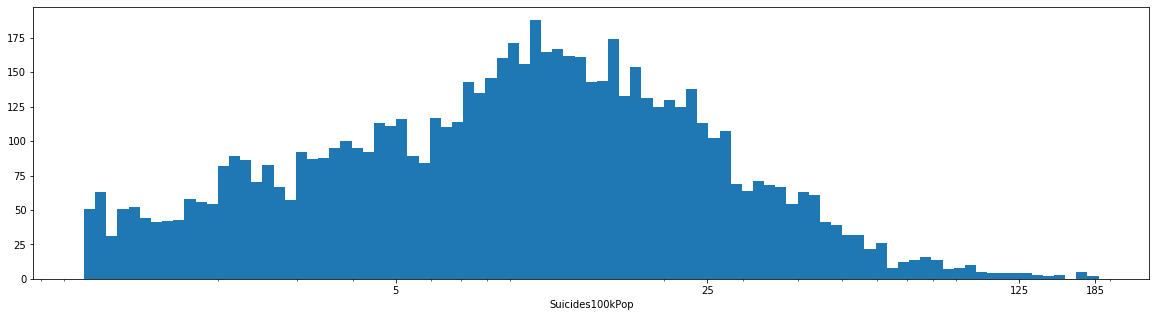

In [18]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(FData['Suicides100kPop'].max())+log_binsize, log_binsize)
plt.figure(figsize=[20, 5])
plt.hist(data = FData, x = 'Suicides100kPop', bins = bins)
plt.xscale('log')
print(FData['Suicides100kPop'].max())
plt.xticks([5,25,125,FData['Suicides100kPop'].max()], ['5','25', '125','185'])
plt.xlabel('Suicides100kPop')
plt.show()

> Data are almost normally distrubuted with one peak between 5-25 'Sucide per/100K' for each agegroup/sex at every country in each year from 1885-2016. 

## Studying suicides No.

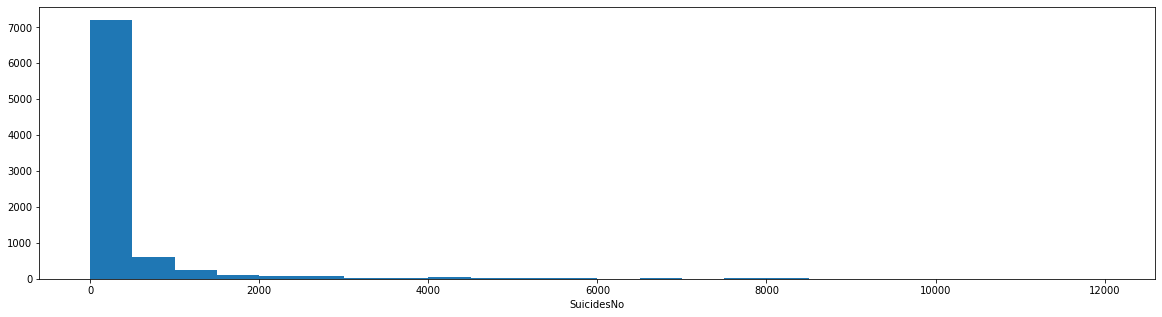

In [14]:
binsize = 500
bins = np.arange(0, FData['SuicidesNo'].max()+binsize, binsize)
plt.figure(figsize=[20, 5])
plt.hist(data = FData, x = 'SuicidesNo', bins = bins)
plt.xlabel('SuicidesNo')
plt.show()

## Exploring Suicide No for each data entry to check the distrubition of sucidies no.

11767


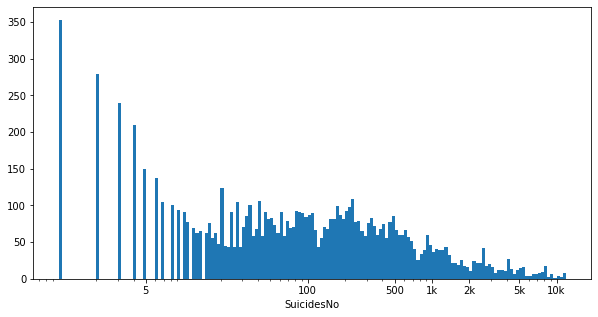

1205


In [15]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(FData['SuicidesNo'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = FData, x = 'SuicidesNo', bins = bins)
plt.xscale('log')
print(FData['SuicidesNo'].max())
plt.xticks([5,100,500, 1e3, 2e3, 5e3, 1e4], ['5','100','500', '1k', '2k', '5k', '10k'])
plt.xlabel('SuicidesNo')
plt.show()
print(len(FData[FData['SuicidesNo']<3]))

### data almost normally distrubuted starting from 5 to 10k sucides No's with a some flactuaions. but most important that the biggest amount of data is between 0-5 suicide no, which means that it affects the mean. 

## Exploring Population

43805214


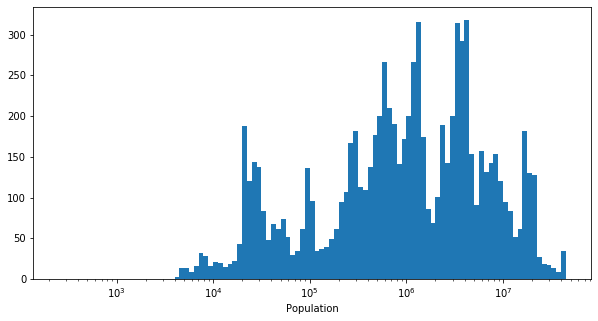

0


In [303]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(FData['Population'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = FData, x = 'Population', bins = bins)
plt.xscale('log')
print(FData['Population'].max())
plt.xlabel('Population')
plt.show()
print(len(FData[FData['Population']<1000]))

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables we can check it is ditrubution here are suicide No/Sucides/100 it is the main variable we need to study. we need see the effect of gender/sex/country/GDP per capita on our main variable. 


## Bivariate Exploration

## First we are going to see the effect of gender and age on total sucide No/ and suicides/100k in all years for all countries. 

<Figure size 1080x720 with 0 Axes>

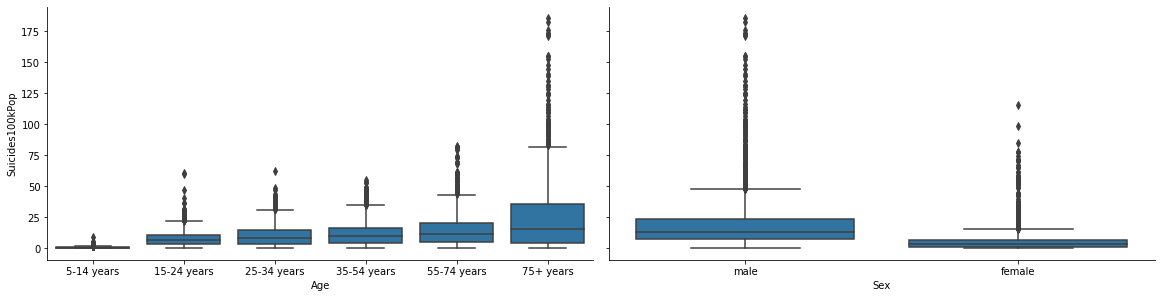

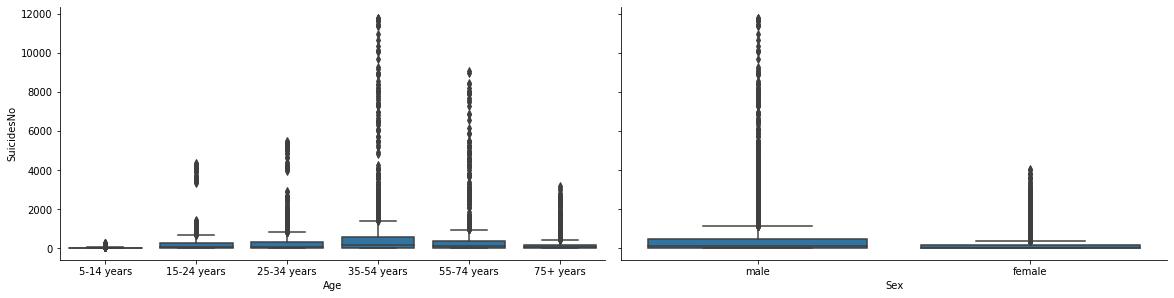

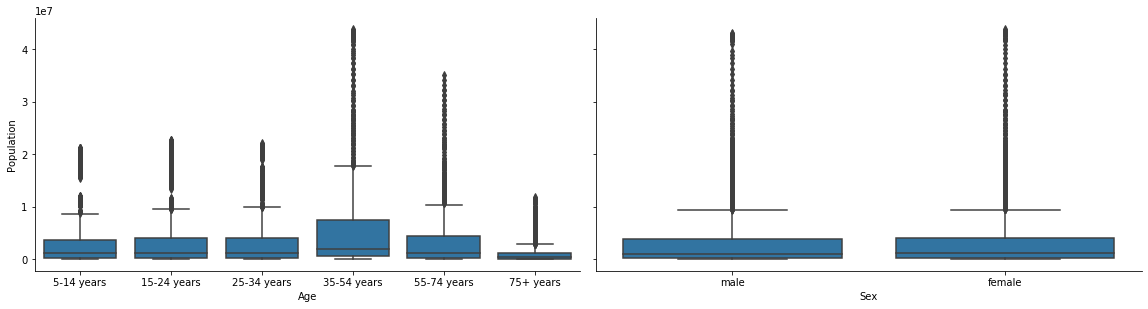

In [179]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = FData, y_vars = ['Suicides100kPop'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.show();
g = sb.PairGrid(data = FData, y_vars = ['SuicidesNo'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.show();
g = sb.PairGrid(data = FData, y_vars = ['Population'], x_vars = ['Age','Sex'],
                size = 4, aspect = 2)
g.map(boxgrid)
plt.show();

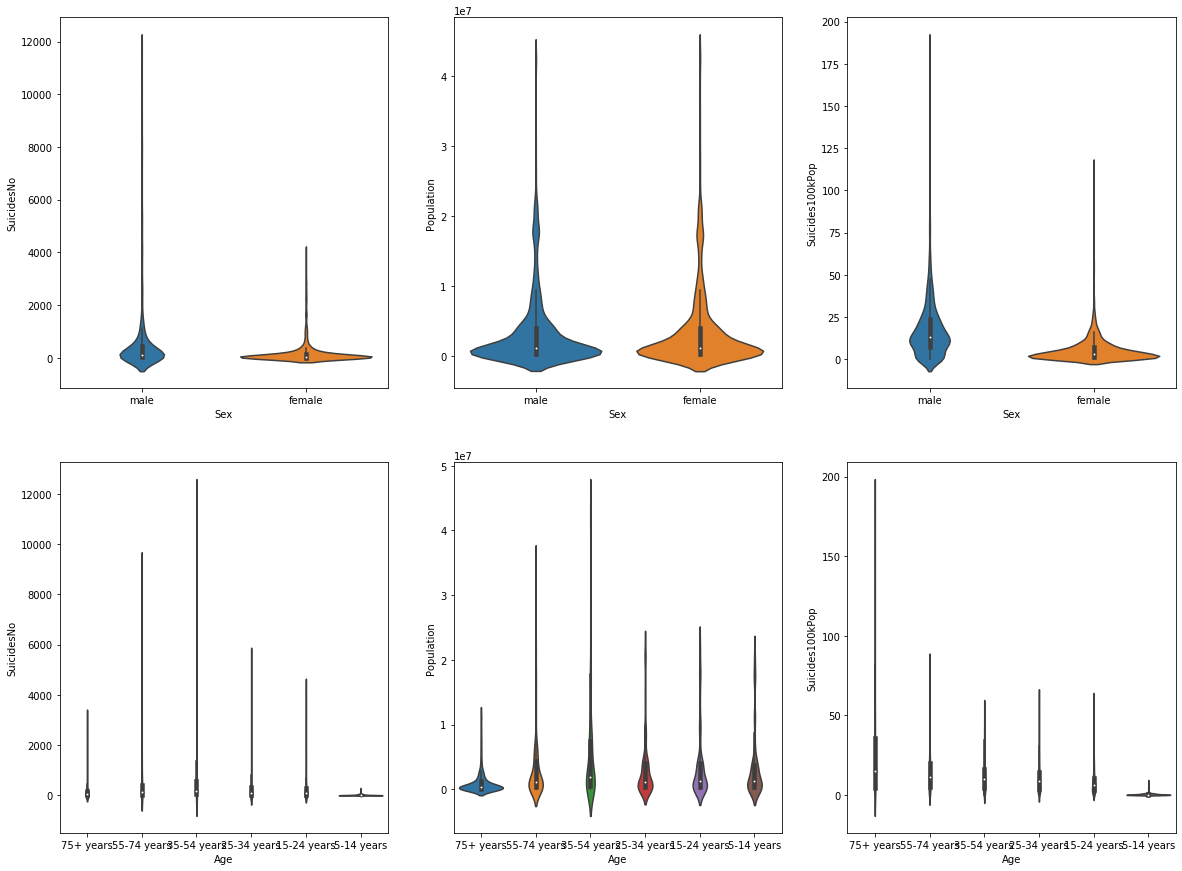

In [219]:
fig, ax = plt.subplots(ncols = 3, nrows = 2 , figsize = [20,15])
categoric_vars=['Sex','Age']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = FData, x = var, y = 'SuicidesNo', ax = ax[i,0])
    sb.violinplot(data = FData, x = var, y = 'Suicides100kPop', ax = ax[i,2])
    sb.violinplot(data = FData, x = var, y = 'Population', ax = ax[i,1])

plt.show()

> Males seem to have higher average and outlayers than females for suicide/100k. also 75+ years age groupseems to have higher. Population is almost identical for males and females but there's a difference in age groups. 

,SuicidesNo
Sex,
female,808505
male,2408594


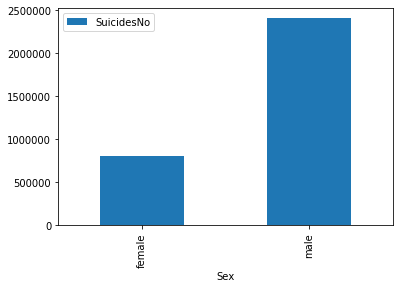

In [68]:
Gender=FData.groupby(['Sex']).SuicidesNo.sum()
Gender=Gender.reset_index()
Gender=Gender.set_index('Sex')
Gender.plot.bar()
Gender.head()

>is that effected by population?

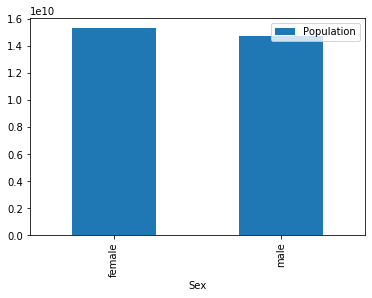

In [234]:
SexPop=FData.groupby(['Sex']).Population.sum()
SexPop=SexPop.reset_index()
SexPop=SexPop.set_index('Sex')
SexPop.plot.bar()

> Male and female population is very close. 

>Suicides/100K could be relaible measure here. 

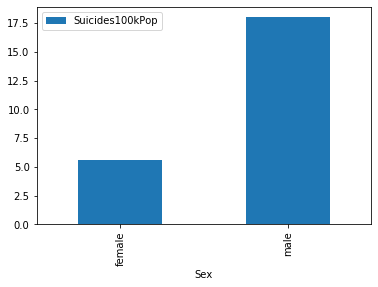

In [71]:
Gender100k=FData.groupby(['Sex']).Suicides100kPop.mean()
Gender100k=Gender100k.reset_index()
Gender100k=Gender100k.set_index('Sex')
Gender100k.plot.bar()

> males suicide/100k is much higher than females. 

,Suicides100kPop
Age,
5-14 years,0.497020
15-24 years,7.923485
25-34 years,10.662553
35-54 years,12.574551
55-74 years,14.724607
75+ years,24.398107


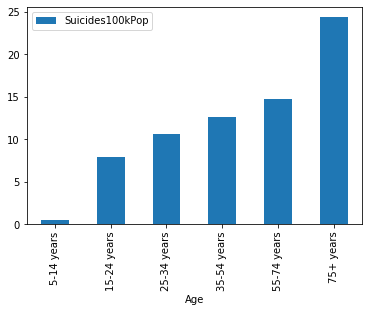

In [102]:
Age=FData.groupby(['Age']).Suicides100kPop.mean()
Age=Age.reset_index()
Age=Age.set_index('Age')
Age.plot.bar()
Age

,SuicidesNo
Age,
5-14 years,18.415849
15-24 years,278.762272
25-34 years,368.983871
35-54 years,785.525947
55-74 years,568.152875
75+ years,236.189341


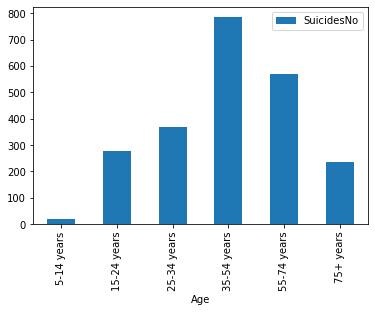

In [108]:
Agex=FData.groupby(['Age']).SuicidesNo.mean()
Agex=Agex.reset_index()
Agex=Agex.set_index('Age')
Agex.plot.bar()
Agex

### is suicideNo is effected by population? 

               Population
Age                      
5-14 years   3.524798e+06
15-24 years  3.582021e+06
25-34 years  3.476201e+06
35-54 years  5.843451e+06
55-74 years  3.548813e+06


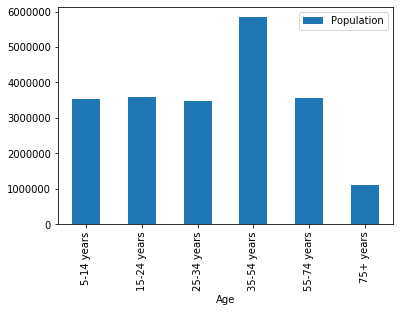

In [104]:
AgePop=FData.groupby(['Age']).Population.mean()
AgePop=AgePop.reset_index()
AgePop=AgePop.set_index('Age')
print(AgePop.head())
AgePop.plot.bar()

> sucide Numbers is high at 35-54 age group but also population is high in the same age group

> population is least at 75 years although they have large suicide Numbers.

> although age group of 75 years has a little representation in the countries included in the data set but it is the grou with highest sucide rates/100k. 

## Relationship of SuicideNo with years

,Year,SuicidesNo
0,1985,86042
1,1986,89746
2,1987,87782
3,1988,85959
4,1989,83563


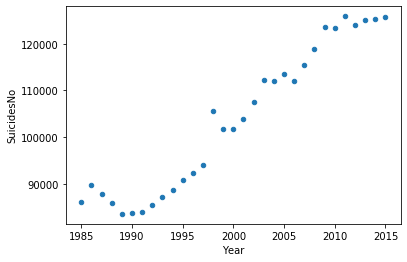

In [237]:
YearSN=FData.groupby(['Year']).SuicidesNo.sum()
YearSN=YearSN.reset_index()
YearSN.plot.scatter(x='Year',y='SuicidesNo')
YearSN.head()

,Year,Population
0,1985,819107850
1,1986,827879282
2,1987,838578273
3,1988,849019285
4,1989,858851951


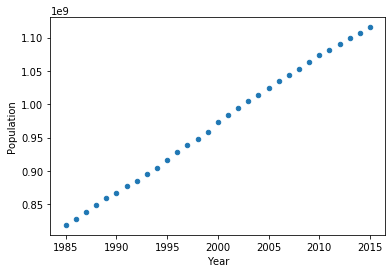

In [246]:
YearP=FData.groupby(['Year']).Population.sum()
YearP=YearP.reset_index()
YearP.plot.scatter(x='Year',y='Population')
YearP.head()

,Year,Suicides100kPop
0,1985,13.071268
1,1986,12.665652
2,1987,12.931594
3,1988,12.951812
4,1989,12.952971


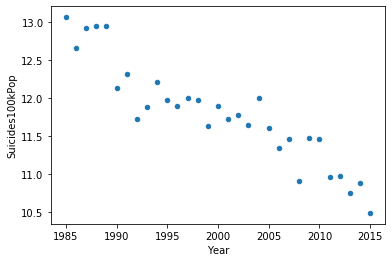

In [243]:
Year=FData.groupby(['Year']).Suicides100kPop.mean()
Year=Year.reset_index()
Year.plot.scatter(x='Year',y='Suicides100kPop')
Year.head()

> We are noticing a trend of decreased number of sucides/100k by years. Although suicide no increase with years, but it seems that we have a linear increase of population effecting it. 

## Relationship between GDPperCapita and Suicide Numbers

              Country  GdpPerCapita  Suicides100kPop
0           Argentina   7914.096774        10.469328
1             Austria  33920.000000        23.905914
2             Belgium  32066.741935        21.237903
3              Brazil   6091.483871         5.846022
4               Chile   7493.064516        10.542043
5            Colombia   3708.967742         5.401586
6             Ecuador   3286.258065         6.304328
7              Greece  17019.387097         4.064839
8             Iceland  38591.064516        12.773306
9              Israel  23125.451613         8.951532
10              Italy  26602.580645         8.518468
11              Japan  36397.548387        21.573199
12         Luxembourg  68798.387097        16.549892
13              Malta  14044.419355         5.032285
14          Mauritius   5370.548387        11.734624
15             Mexico   7138.451613         4.707500
16        Netherlands  35381.516129        10.589059
17        Puerto Rico  18352.645161        10.

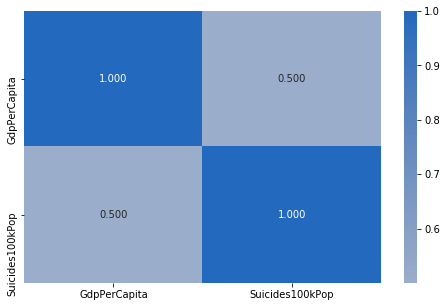

In [122]:
GDP=FData.groupby(['Country']).GdpPerCapita.mean()
GDP=GDP.reset_index()
GDP
GDP2=FData.groupby(['Country']).Suicides100kPop.mean()
GDP2=GDP2.reset_index()
GDP2
GDP=GDP.merge(GDP2)
print(GDP)
plt.figure(figsize = [8, 5])
sb.heatmap(GDP[['GdpPerCapita','Suicides100kPop']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> Maybe we need more data to check the correlation between GDP/Capita and Sucides/100k so we will group by Country year, taking the increase/decrease of each country in GDP into account. 

           CountryYear  GdpPerCapita
0        Argentina1985          3264
1        Argentina1986          4072
2        Argentina1987          4026
3        Argentina1988          4458
4        Argentina1989          2670
..                 ...           ...
708  United States2011         53452
709  United States2012         55170
710  United States2013         56520
711  United States2014         58531
712  United States2015         60387

[713 rows x 2 columns]
           CountryYear  GdpPerCapita  Suicides100kPop
0        Argentina1985          3264        11.205833
1        Argentina1986          4072        12.741667
2        Argentina1987          4026        12.081667
3        Argentina1988          4458        12.186667
4        Argentina1989          2670        11.577500
..                 ...           ...              ...
708  United States2011         53452        13.530000
709  United States2012         55170        13.761667
710  United States2013         56520        13

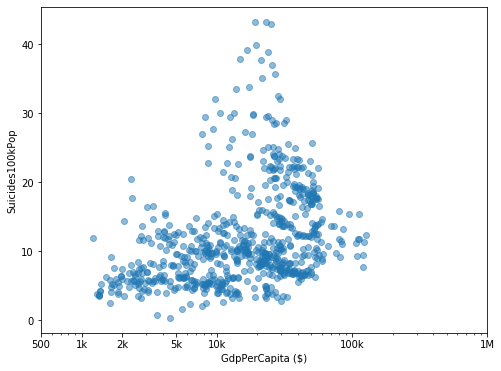

In [170]:
GDPYear=FData.groupby(['CountryYear']).GdpPerCapita.mean()
GDPYear=GDPYear.reset_index()
print(GDPYear)
GDP2Year=FData.groupby(['CountryYear']).Suicides100kPop.mean()
GDP2Year=GDP2Year.reset_index()
GDPYear=GDPYear.merge(GDP2Year)
print(GDPYear)
plt.figure(figsize = [8, 6])
plt.scatter(data = GDPYear, x = 'GdpPerCapita', y = 'Suicides100kPop', alpha = 0.5)
plt.ylabel('Suicides100kPop')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 1e5,1e6], [500, '1k', '2k', '5k', '10k', '100k','1M'])
plt.xlabel('GdpPerCapita ($)')
plt.show()


####  GDP per capita is highly affected by inflation and population so we will measure it in the period of last 10 years from 2006 to 2016 to reduce the effect of inflation.

           CountryYear  GdpPerCapita
0        Argentina2006          6475
1        Argentina2007          7918
2        Argentina2008          9843
3        Argentina2009          8961
4        Argentina2010         11273
..                 ...           ...
225  United States2011         53452
226  United States2012         55170
227  United States2013         56520
228  United States2014         58531
229  United States2015         60387

[230 rows x 2 columns]
           CountryYear  GdpPerCapita  Suicides100kPop
0        Argentina2006          6475        10.685000
1        Argentina2007          7918         9.862500
2        Argentina2008          9843         9.842500
3        Argentina2009          8961         8.943333
4        Argentina2010         11273         9.270000
..                 ...           ...              ...
225  United States2011         53452        13.530000
226  United States2012         55170        13.761667
227  United States2013         56520        13

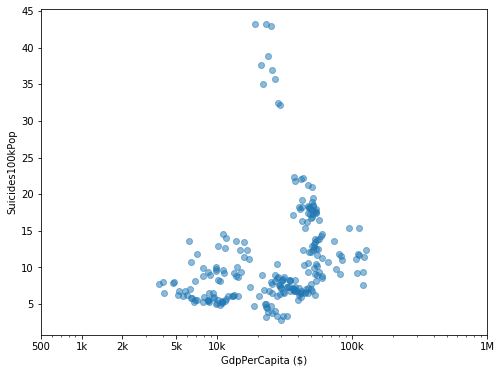

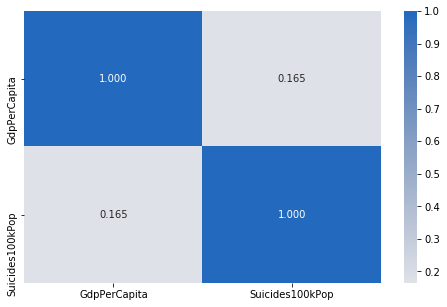

In [19]:
Last10years=FData[FData['Year']>2005]
GDPYear10=Last10years.groupby(['CountryYear']).GdpPerCapita.mean()
GDPYear10=GDPYear10.reset_index()
print(GDPYear10)
GDP2Year10=Last10years.groupby(['CountryYear']).Suicides100kPop.mean()
GDP2Year10=GDP2Year10.reset_index()
GDPYear10=GDPYear10.merge(GDP2Year10)
print(GDPYear10)
plt.figure(figsize = [8, 6])
plt.scatter(data = GDPYear10, x = 'GdpPerCapita', y = 'Suicides100kPop', alpha = 0.5)
plt.ylabel('Suicides100kPop')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 1e5,1e6], [500, '1k', '2k', '5k', '10k', '100k','1M'])
plt.xlabel('GdpPerCapita ($)')
plt.show()
plt.figure(figsize = [8, 5])
sb.heatmap(GDPYear10[['GdpPerCapita','Suicides100kPop']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>Seems there is no much difference. GDP has small correlation with sucides/100K.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Every relationship is explained in it is section. 

## Multivariate Exploration

> The main thing we need to measure here is the effect of GDP on suicides/100k taking into account the effect of sex, age groups.

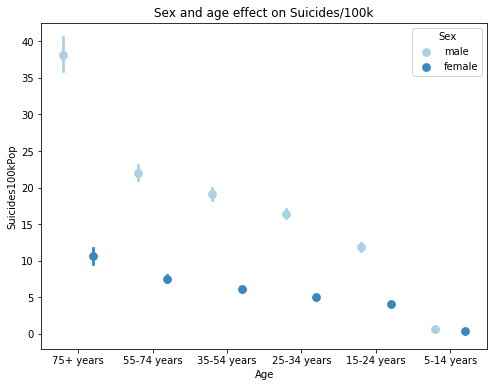

In [301]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = FData, x = 'Age', y = 'Suicides100kPop', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Sex and age effect on Suicides/100k')
plt.ylabel('Suicides100kPop')
ax.set_yticklabels([],minor = True)
plt.show();

> hierarchy of suicide/100k is clear for sex and age groups.

>We need to clarify it for the highest and lowest end of Gdp per capita.

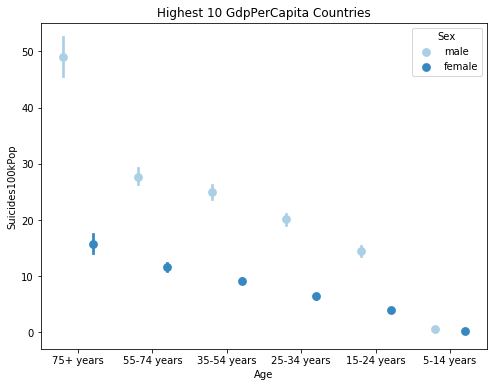

In [299]:
Rich10=GDP.nlargest(10,'GdpPerCapita')
Richz10= FData[FData['Country'].isin(Rich10.Country)]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Richz10, x = 'Age', y = 'Suicides100kPop', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Highest 10 GdpPerCapita Countries')
plt.ylabel('Suicides100kPop')
ax.set_yticklabels([],minor = True)
plt.show();

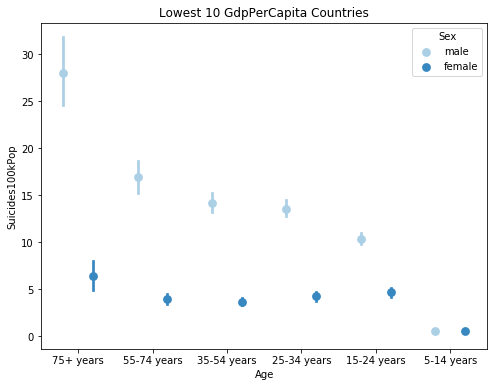

In [300]:
Poorest10=GDP.nsmallest(10,'GdpPerCapita')
Poorestz10= FData[FData['Country'].isin(Poorest10.Country)]
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Poorestz10, x = 'Age', y = 'Suicides100kPop', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Lowest 10 GdpPerCapita Countries')
plt.ylabel('Suicides100kPop')
ax.set_yticklabels([],minor = True)
plt.show();

> Interstingly the lowest 10 GDp per capita have overall lower suicides/100k for all sexes and age groups

## change of mean sucides/100k per year taking Gender into consedration.

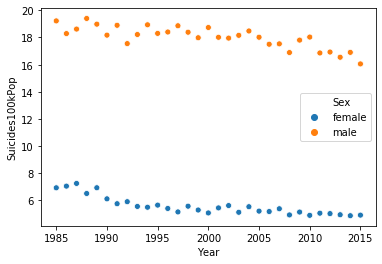

In [259]:
YearS=FData.groupby(['Year','Sex']).Suicides100kPop.mean()
YearS=YearS.reset_index()
sb.scatterplot(data=YearS,x='Year',y='Suicides100kPop',hue='Sex')
YearS.head()
plt.show()

> there's an over all decrease in the mean suicides/100k for all year. 

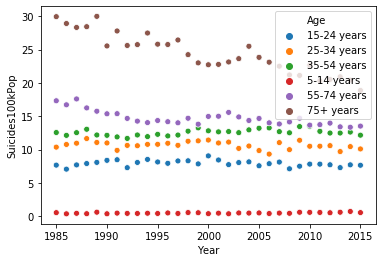

In [260]:
YearA=FData.groupby(['Year','Age']).Suicides100kPop.mean()
YearA=YearA.reset_index()
sb.scatterplot(data=YearA,x='Year',y='Suicides100kPop',hue='Age')
Year.head()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Data shows that overall males have higher percentages of suicides/100k, also some age groups have higher suicdes/100k than others 75+ year group. although the mean of that precentages decreases over years.

### Were there any interesting or surprising interactions between features?

> The lowest 10 GDP countries have below average suicides/100K percentages. while the highest 10 GDP countries has higher suicides/100K percentages.